 #Kolin Bilbrew

Labpartner(s)

In [4]:
#import statements go here
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Class 7.1

For today's lab you will need to download Davinci Resolve: https://www.blackmagicdesign.com/products/davinciresolve
It will take some time

Today we are going to go over cartopy a bit more, Victoria is giving a demo on how to make movies, and you will start the Pandas course in Datacamp.

Note that due date for Lab 6.2 is on Thursday. Take your time and ask questions.

Also note that your project topic is due 10/13. There is an assignment tab up in moodle to turn this in.

# Warmups 7.1

**W.1** Play around with some map projections in cartopy. 

**W.2** See if you can make a nice map of Antarctica. Bonus if you can label McMurdo Station

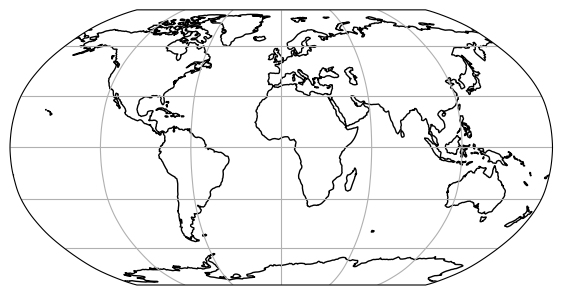

In [25]:
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines();


(-2800000.0, 2800000.0)

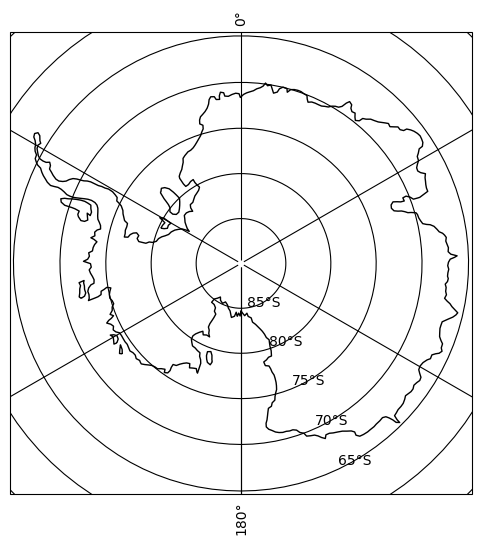

In [27]:

# from https://github.com/thomasteisberg/glaciology-util/blob/master/loading_data/Plotting%20Antarctic%20Datasets.ipynb
crs_3031 = ccrs.Stereographic(central_latitude=-90, true_scale_latitude=-71)

fig, ax = plt.subplots(figsize=(8,6), facecolor='white', subplot_kw=dict(projection=crs_3031)) # Create our plot

ax.coastlines(resolution='110m', color='k') # Add coastlines
gl = ax.gridlines(draw_labels=True, color='k') # Add gridlines to make latitudes/longitudes
gl.ylabel_style = {'color': 'k'} # The latitudes are shown inside the plot, so they need to be white for visibility

ax.set_aspect('equal')
ax.set_xlim(-2.8e6,2.8e6) # Quick note here: If you use set_(x/y)lim, you're setting the limits in projected coordinates.
ax.set_ylim(-2.8e6,2.8e6) #                  If you prefer, you can use ax.set_extent to set the limits in any coordinate system you want

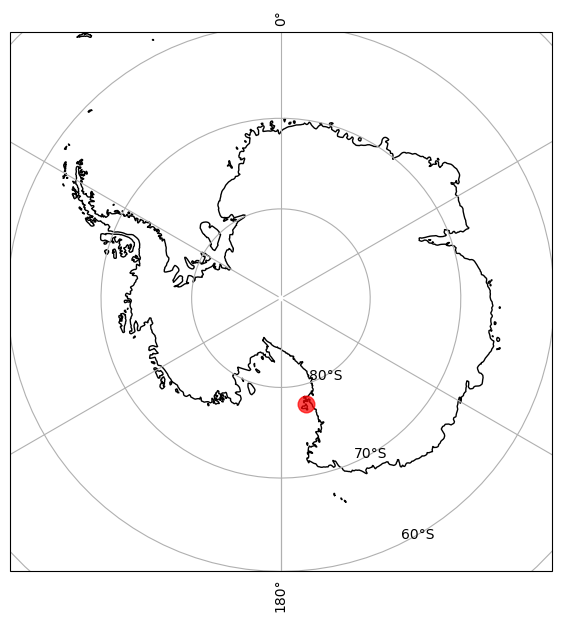

In [29]:
# from https://fabienmaussion.info/climate_system/projects/04_Getting_started_Antarctica.html

#McMurdo Station
# 77 degrees 51 minutes S, 166 degrees 40 minutes E,
lat = -77-51/60
lon = 166+40/60

# Prepare the figure with the wanted size:
fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
#z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain') 
ax.coastlines()
ax.gridlines(draw_labels=True)

# add in McMurdo
ax.plot(lon, lat, marker='o', color='red', markersize=12,
            alpha=0.7, transform=ccrs.PlateCarree())

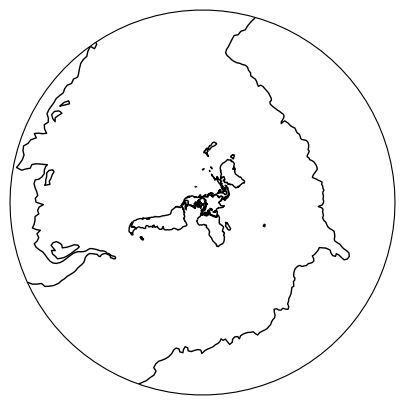

In [16]:
# first attempt 
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.SouthPolarStereo(true_scale_latitude=0))
ax.coastlines(resolution='110m')
#ax.gridlines()

# Lecture 7.1

### Agenda:

- Questions
- Go over some cartopy from last time (6.2 corrected lab on github)
- Movie demo from Victoria (see movie_demo_2024 notebook on github)

### Questions

- See Lab 6.2 corrected versi0n
- See movie_demo_2024 notebook

# Lab 7.1

**E.1** Complete Data Manipulation with Pandas Ch 1-2 in datacamp. I'm assigning all of this course to the class, as many of you have .csv type data that works well with Pandas. If you don't have data that Pandas is useful for, come see me and we can talk about an alternate assignment.


**E.2** Make notes for yourself on progamming tecniques and commands you learned in the datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

This week's project:

**E.3** Make two data animations using both the methods that Victoria demonstrated. You can use some of the model data we have been looking at, or animate a plot of your data, or whatever scientific thing you like. The goal here is to get familiar with the animation methods and tell a story using data. You will present this to the class next Tuesday (remember 10/17 is a holiday). Add your animations to this ppt: https://lsu.box.com/s/e99nkcr3nyds4r4gswilxgol5q6lbz5l

In [28]:
#! /usr/bin/env python
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
import matplotlib.pyplot as plt
import numpy as np     #work with numbers
import xarray as xr     #work with arrays and open files
import datetime        #work with date
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import colorbar, colors

#Sets font formats
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
#mpl.rcParams['lines.linewidth'] = 6.0

In [94]:
link ="C:/Users/vgarza6/Desktop/010_archv.2002_009_06_2d.nc"
data_2002 = xr.open_dataset(link, decode_times=False)

In [96]:
data_2002

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 1537, Longitude: 2101)
Coordinates:
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.1 18.11 ... 31.95 31.96
  * Longitude              (Longitude) float32 -98.0 -97.99 ... -77.01 -77.0
  * MT                     (MT) float64 3.69e+04
Data variables:
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                CF-1.6
    title:                      HYCOM
    source:                     HYCOM archive file
    experiment:                 01.0
    comment:                    p-grid
    history:                    Wed Oct 27 22:18:19 2021: ncks -x -v surface_...
    history_of_appended_files:  Wed Oct 27 22:18:19 2021: Appended file wind....
    NCO:                        netCDF Operators version 4.9.8 (Homepage = ht...

In [98]:
date = datetime(2002,9,6)

C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


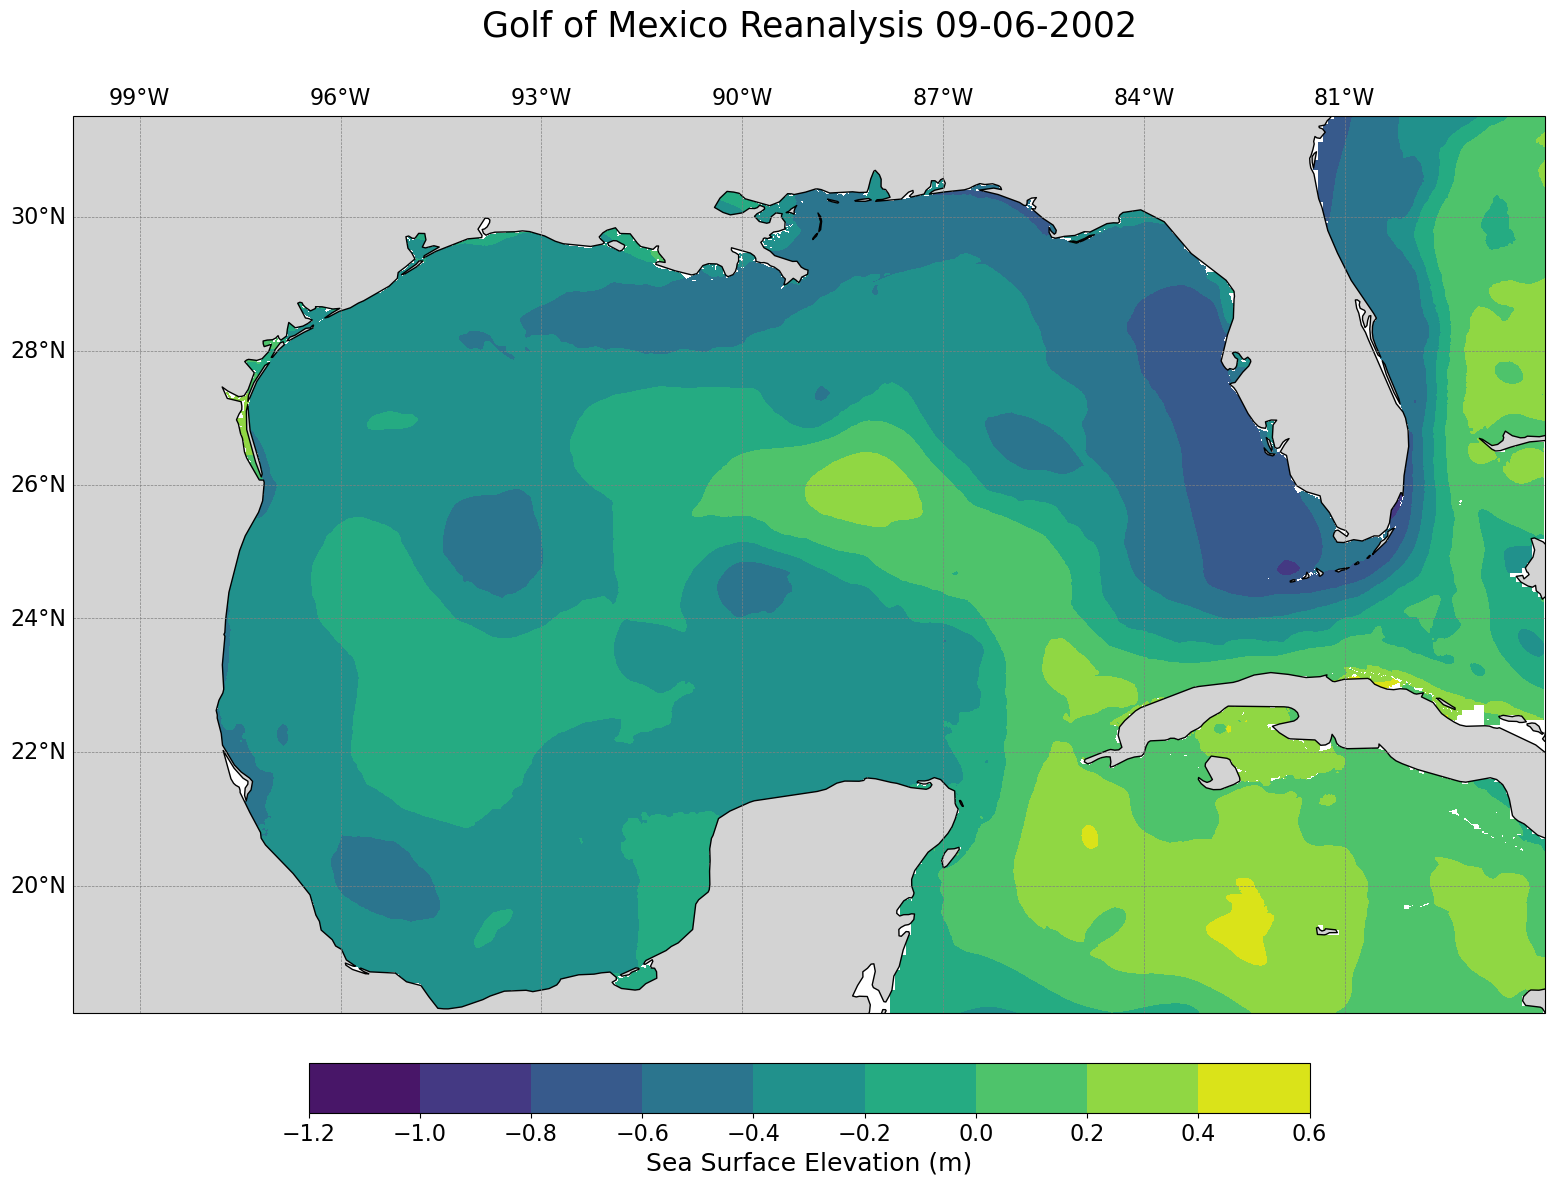

In [100]:
#Creates the type of projection and the area of the projection
fig, ax = plt.subplots(figsize =(19,13),subplot_kw=dict(projection=ccrs.PlateCarree()))  
ax.set_extent([260,282, 18.11, 31.5])

#set variables from the data that will be plotted onto the map
var = data_2002.ssh[0,:,:] 
x= data_2002.Longitude
y =data_2002.Latitude

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree())#,N=7)
  
#Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Elevation (m)" , size = 18)

    #Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='lightgrey')
ax.add_feature(land_50m)

#Sets the graph title and format the size and location of the title
ax.set_title('Golf of Mexico Reanalysis '+ str(date.strftime("%m-%d-%Y")), y=1.08, fontsize=25)
    
    ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
        #and sets the grid lines on the graph
    ##Set the grid lines to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linewidth=.5, color='gray', linestyle='--')
gl.xlabels_top = True    
gl.ylabels_left = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 16}
gl.ylabel_style = {'size' : 16}

In [102]:
#Setting start date: (Make sure to re run this section each time) 
number_of_days = 10 # How many days do we want to cycle through
date = datetime(2002,9,6) 

min_level = -1.25
#Remember in when coding data goes up to 2, but doesn't include 2, so we do 2.01 so it has the number 2
max_level = 0.901 

levels = np.arange(min_level,max_level,0.1) #We want the range from our min to max incrementing by 0.1

save_location = 'C:/Users/vgarza6/Desktop/7.1'
file_name = 'Gulf_of_Mexico_Reanalysis_7.1'

In [110]:
#Setting start date: (Make sure to re run this section each time) 
number_of_days = 10 # How many days do we want to cycle through
date = datetime(2002,9,7) 

min_level = -1.25
#Remember in when coding data goes up to 2, but doesn't include 2, so we do 2.01 so it has the number 2
max_level = 0.901 

levels = np.arange(min_level,max_level,0.1) #We want the range from our min to max incrementing by 0.1

save_location = 'C:/Users/vgarza6/Desktop/7.1'
file_name = 'Gulf_of_Mexico_Reanalysis_7.1'

In [114]:
#Setting start date: (Make sure to re run this section each time) 
number_of_days = 10 # How many days do we want to cycle through
date = datetime(2002,9,8) 

min_level = -1.25
#Remember in when coding data goes up to 2, but doesn't include 2, so we do 2.01 so it has the number 2
max_level = 0.901 

levels = np.arange(min_level,max_level,0.1) #We want the range from our min to max incrementing by 0.1

save_location = 'C:/Users/vgarza6/Desktop/7.1'
file_name = 'Gulf_of_Mexico_Reanalysis_7.1'

In [115]:
#Setting start date: (Make sure to re run this section each time) 
number_of_days = 10 # How many days do we want to cycle through
date = datetime(2002,9,9) 

min_level = -1.25
#Remember in when coding data goes up to 2, but doesn't include 2, so we do 2.01 so it has the number 2
max_level = 0.901 

levels = np.arange(min_level,max_level,0.1) #We want the range from our min to max incrementing by 0.1

save_location = 'C:/Users/vgarza6/Desktop/7.1'
file_name = 'Gulf_of_Mexico_Reanalysis_7.1'

C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


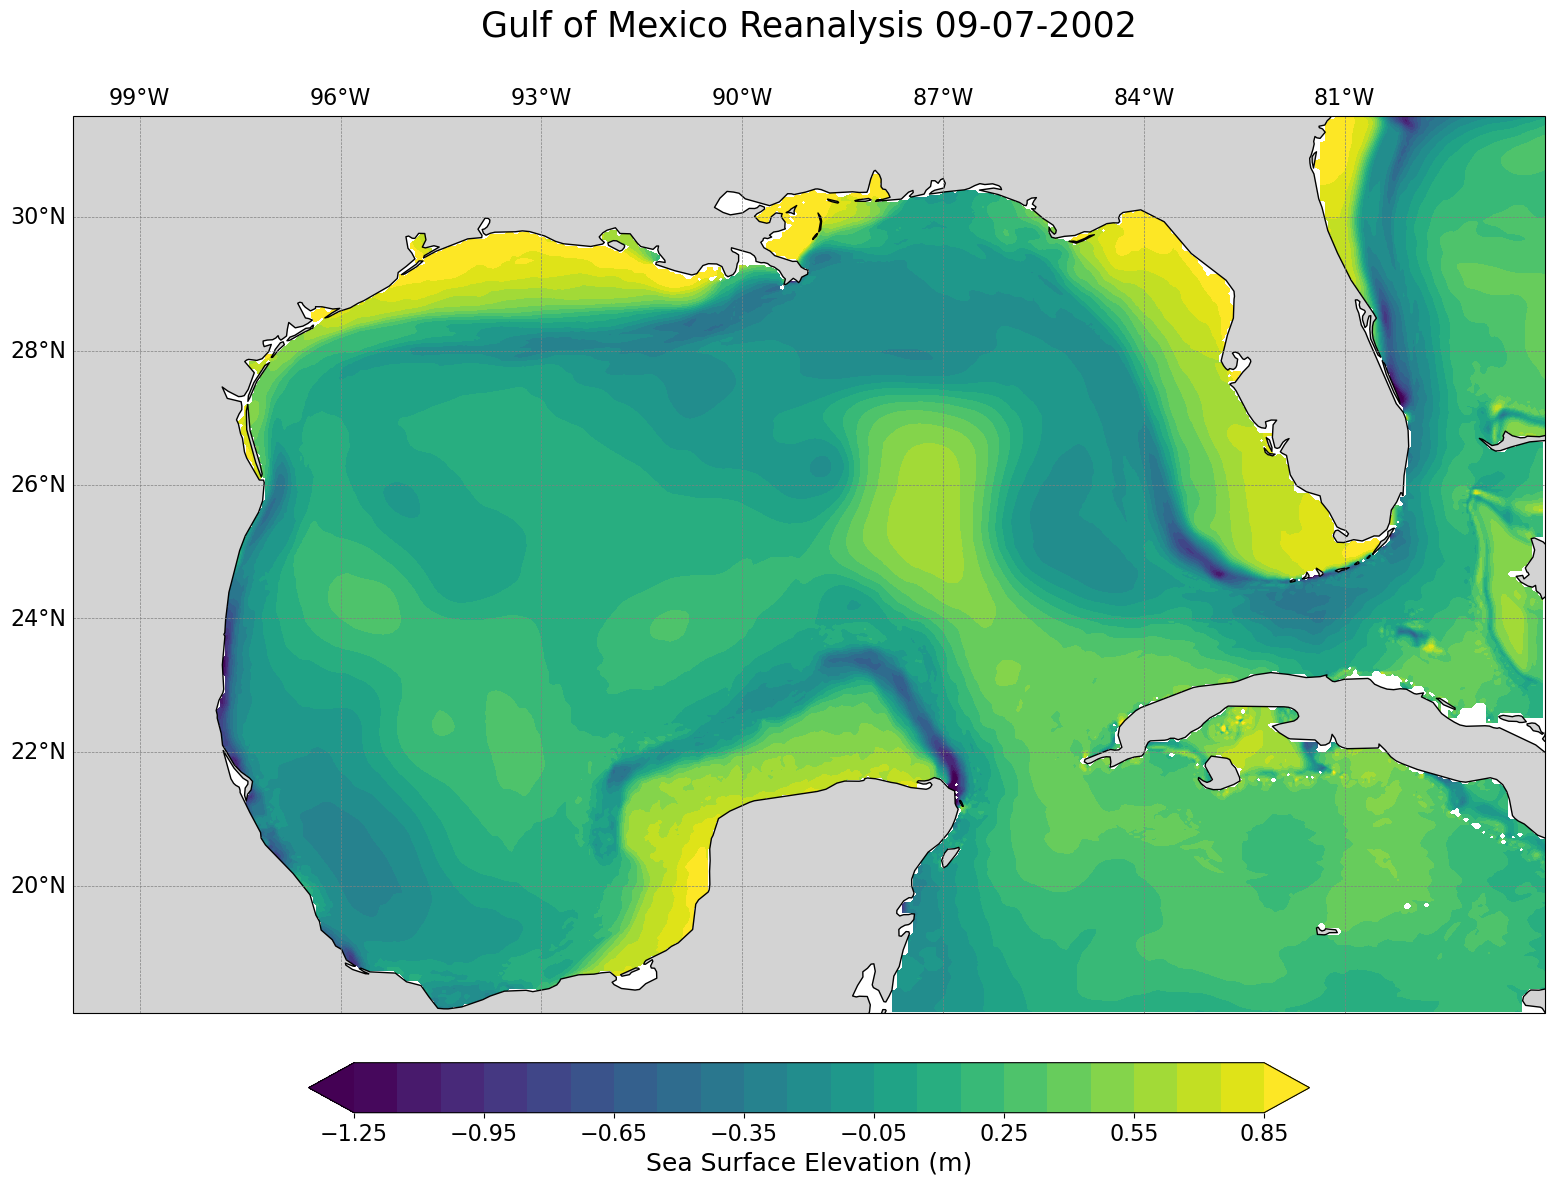

C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


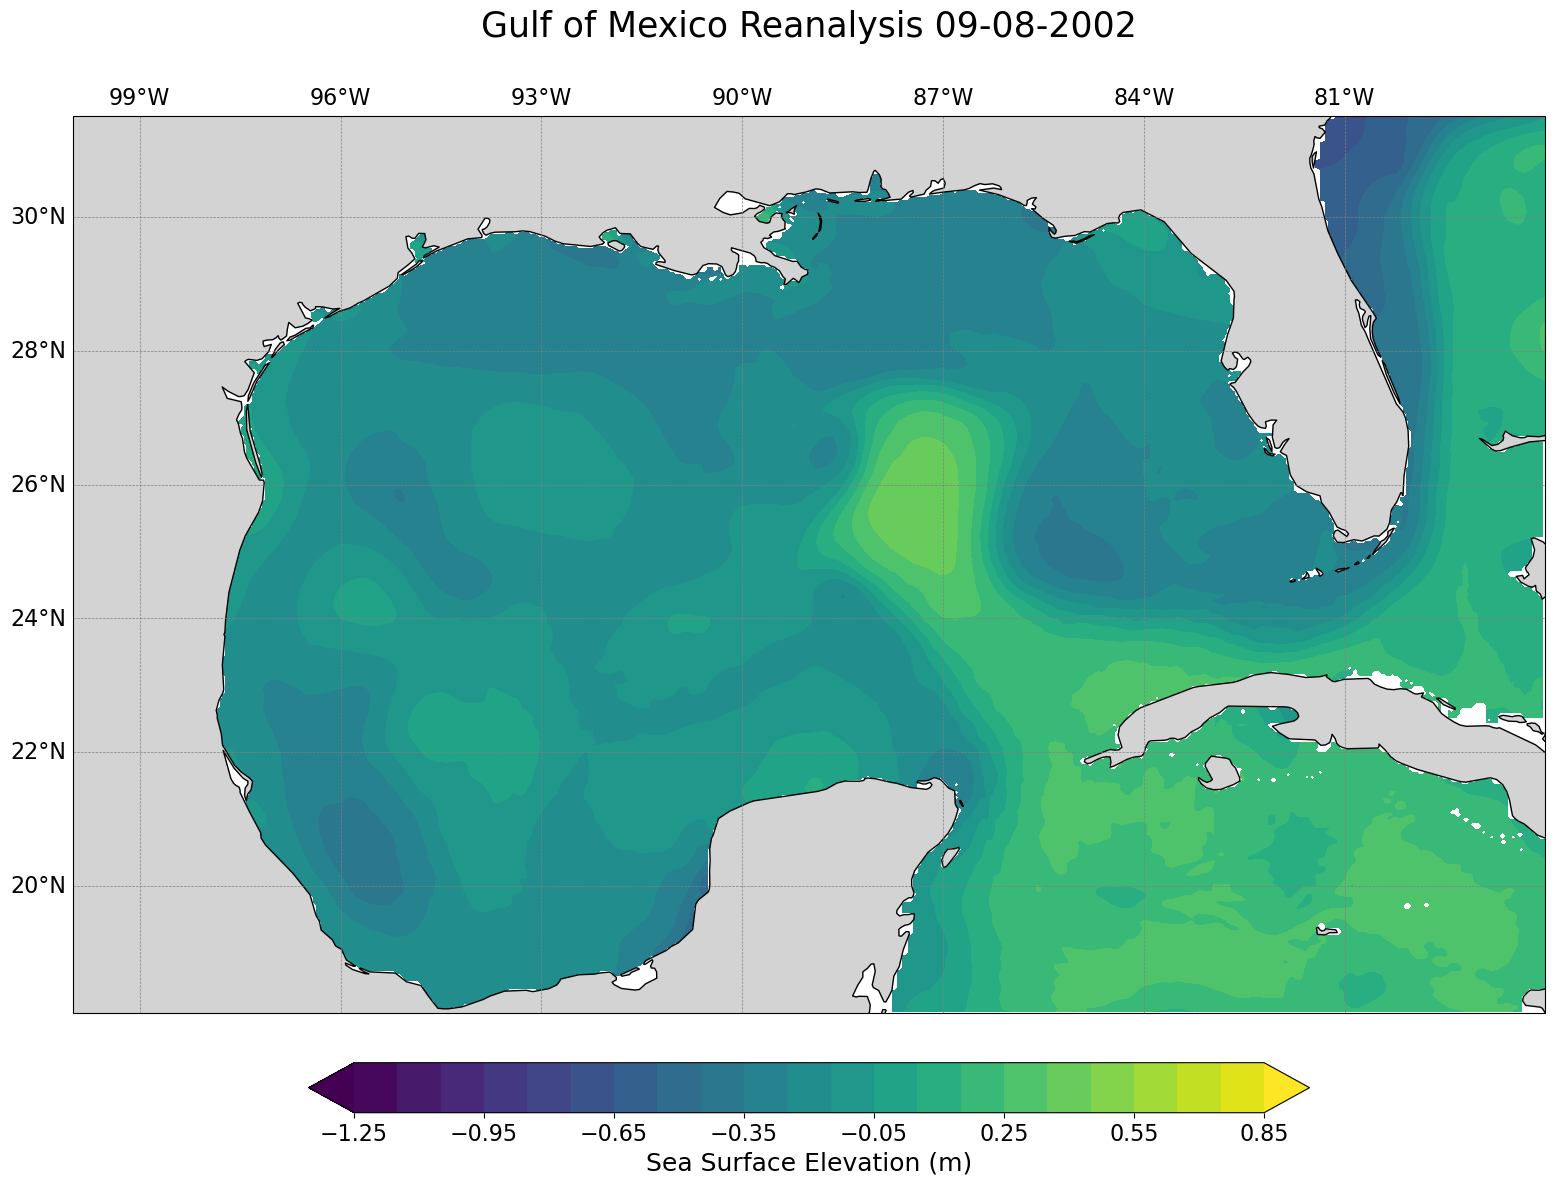

C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


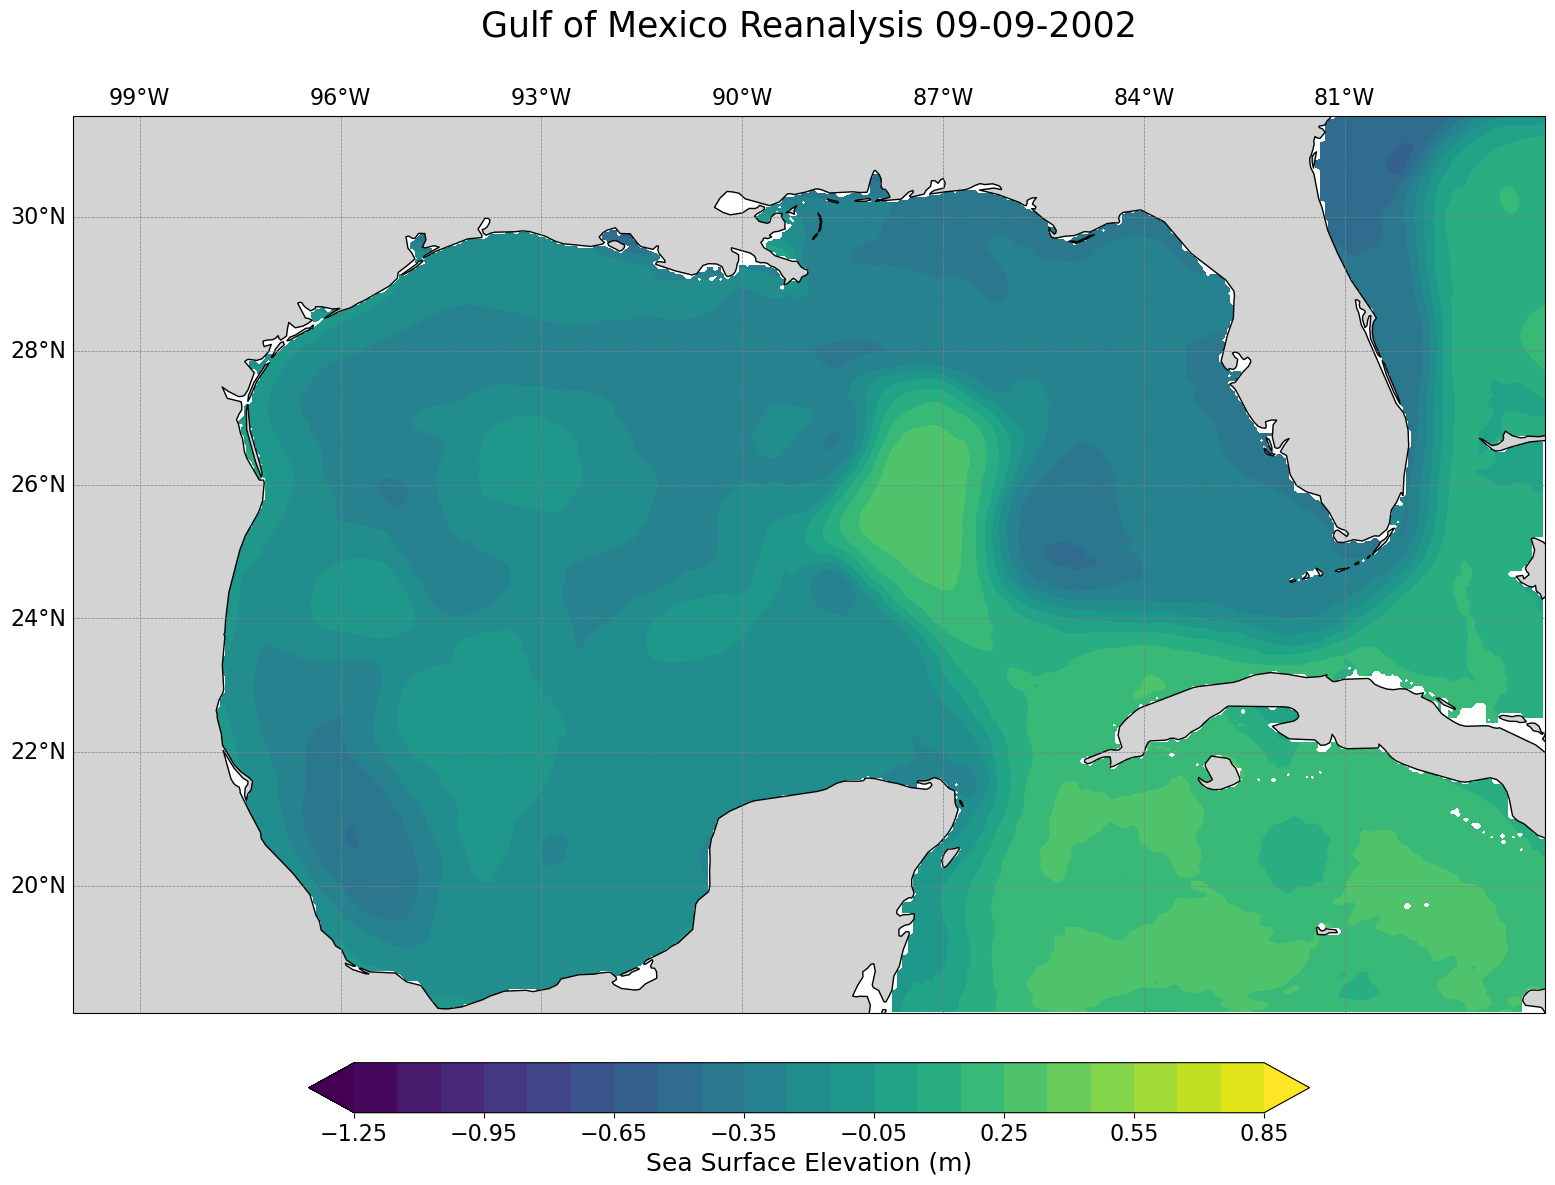

C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


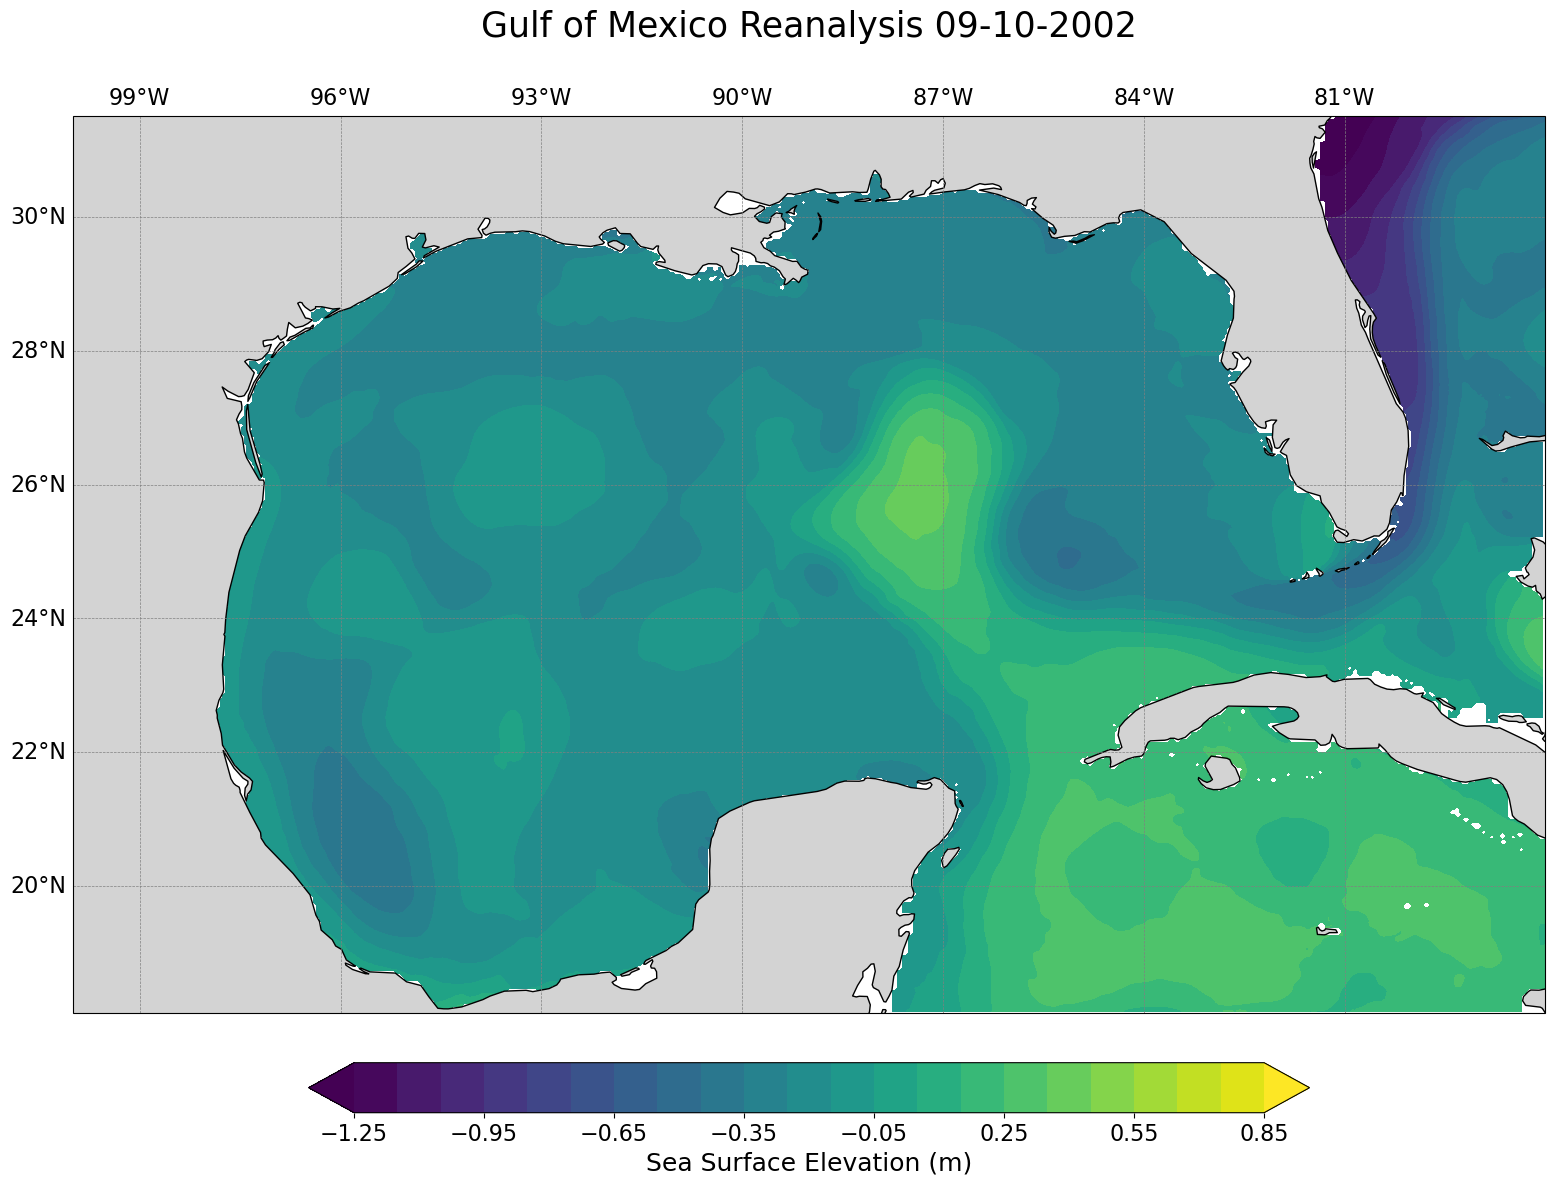

C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


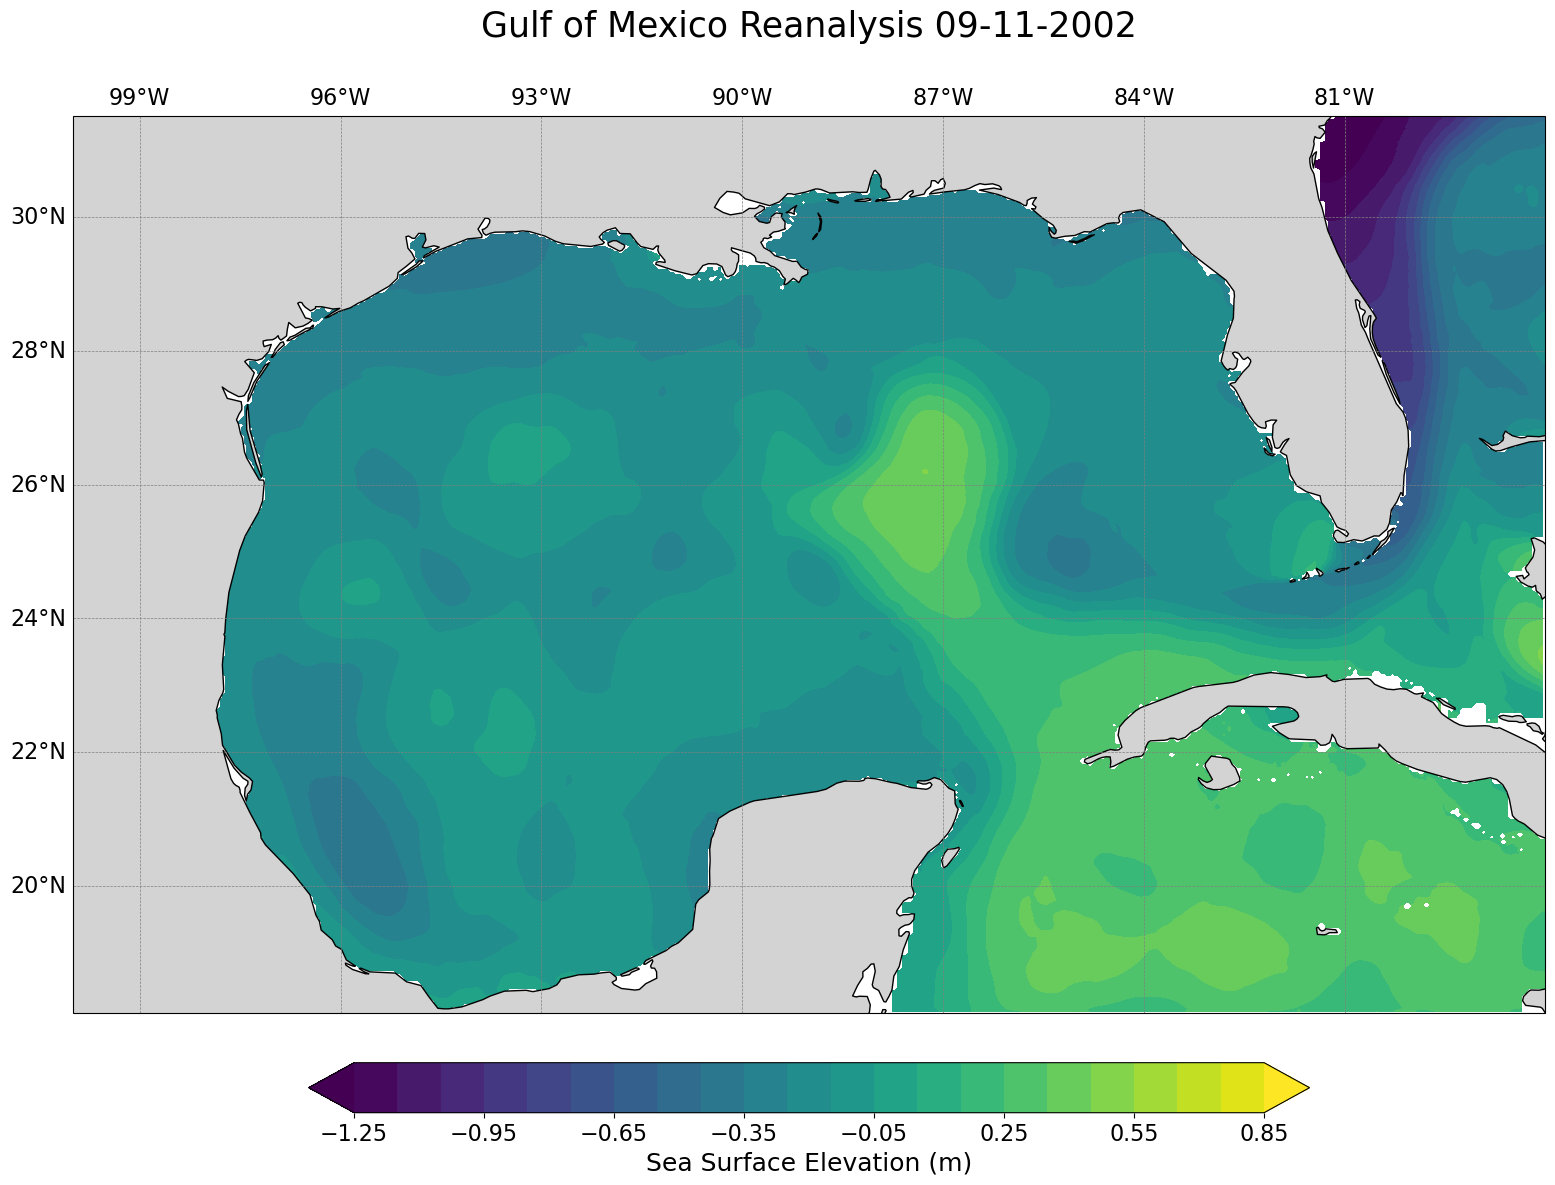

C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


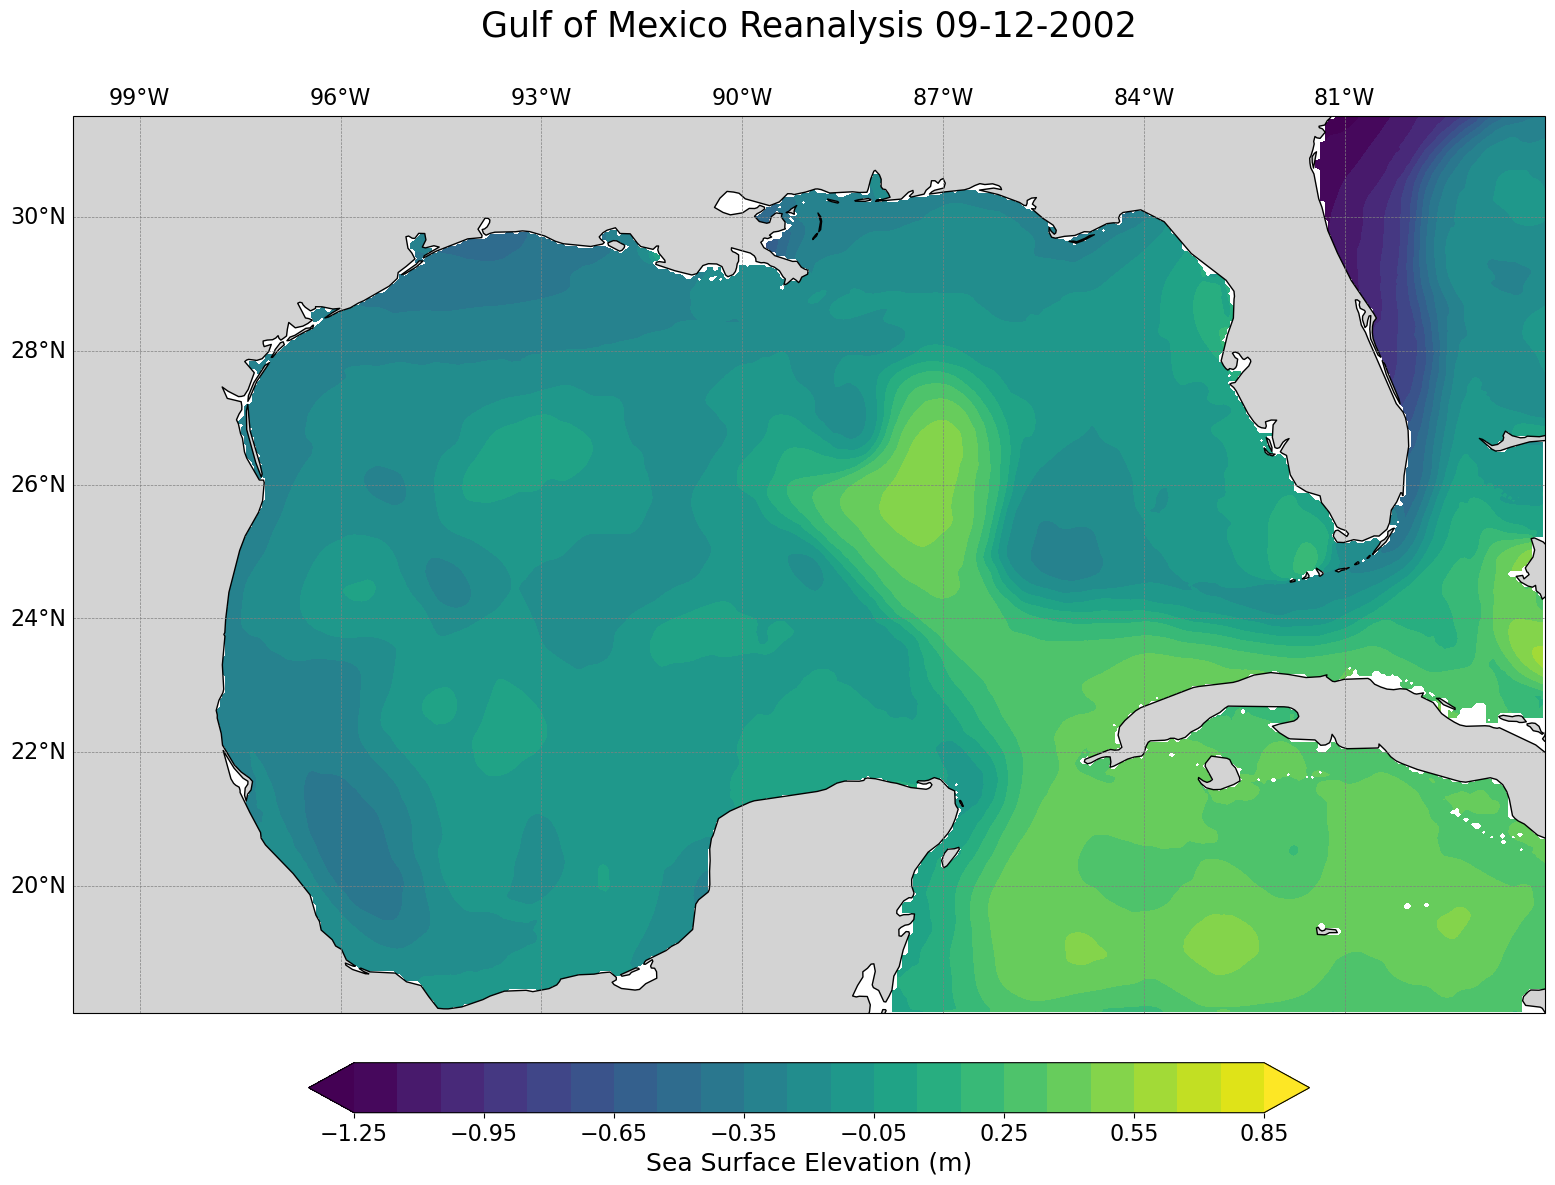

C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


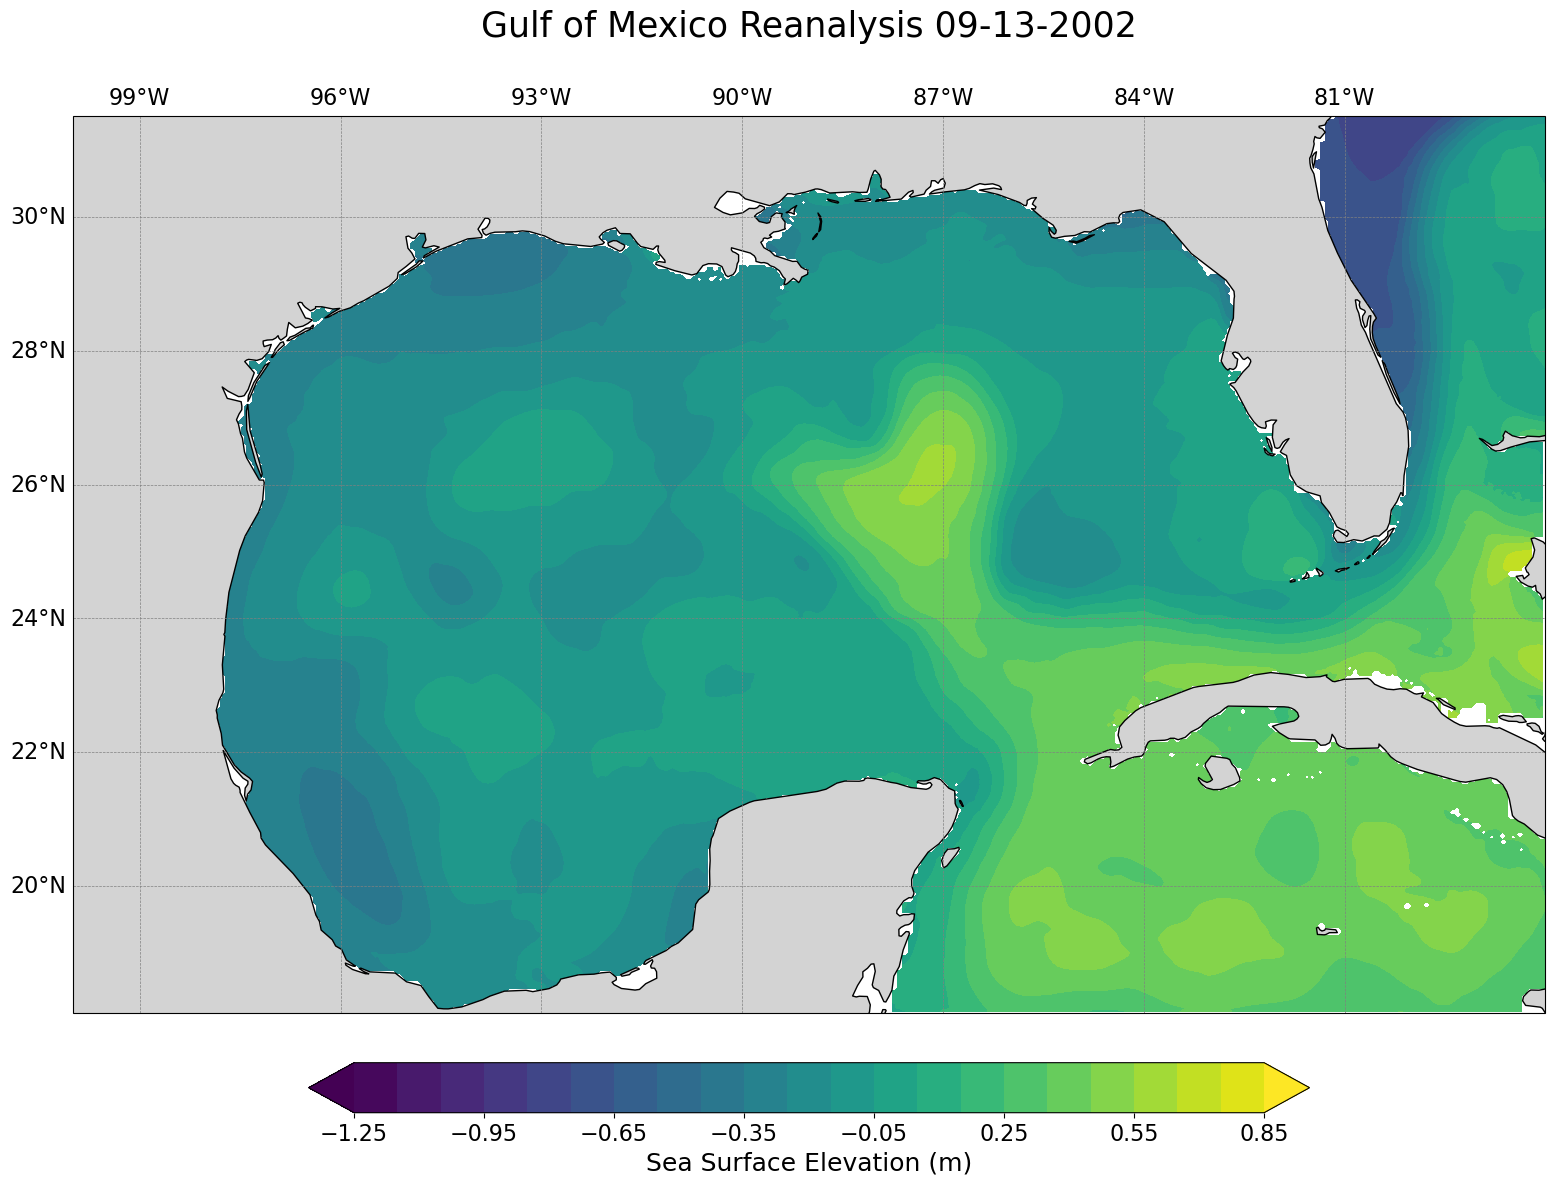

C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


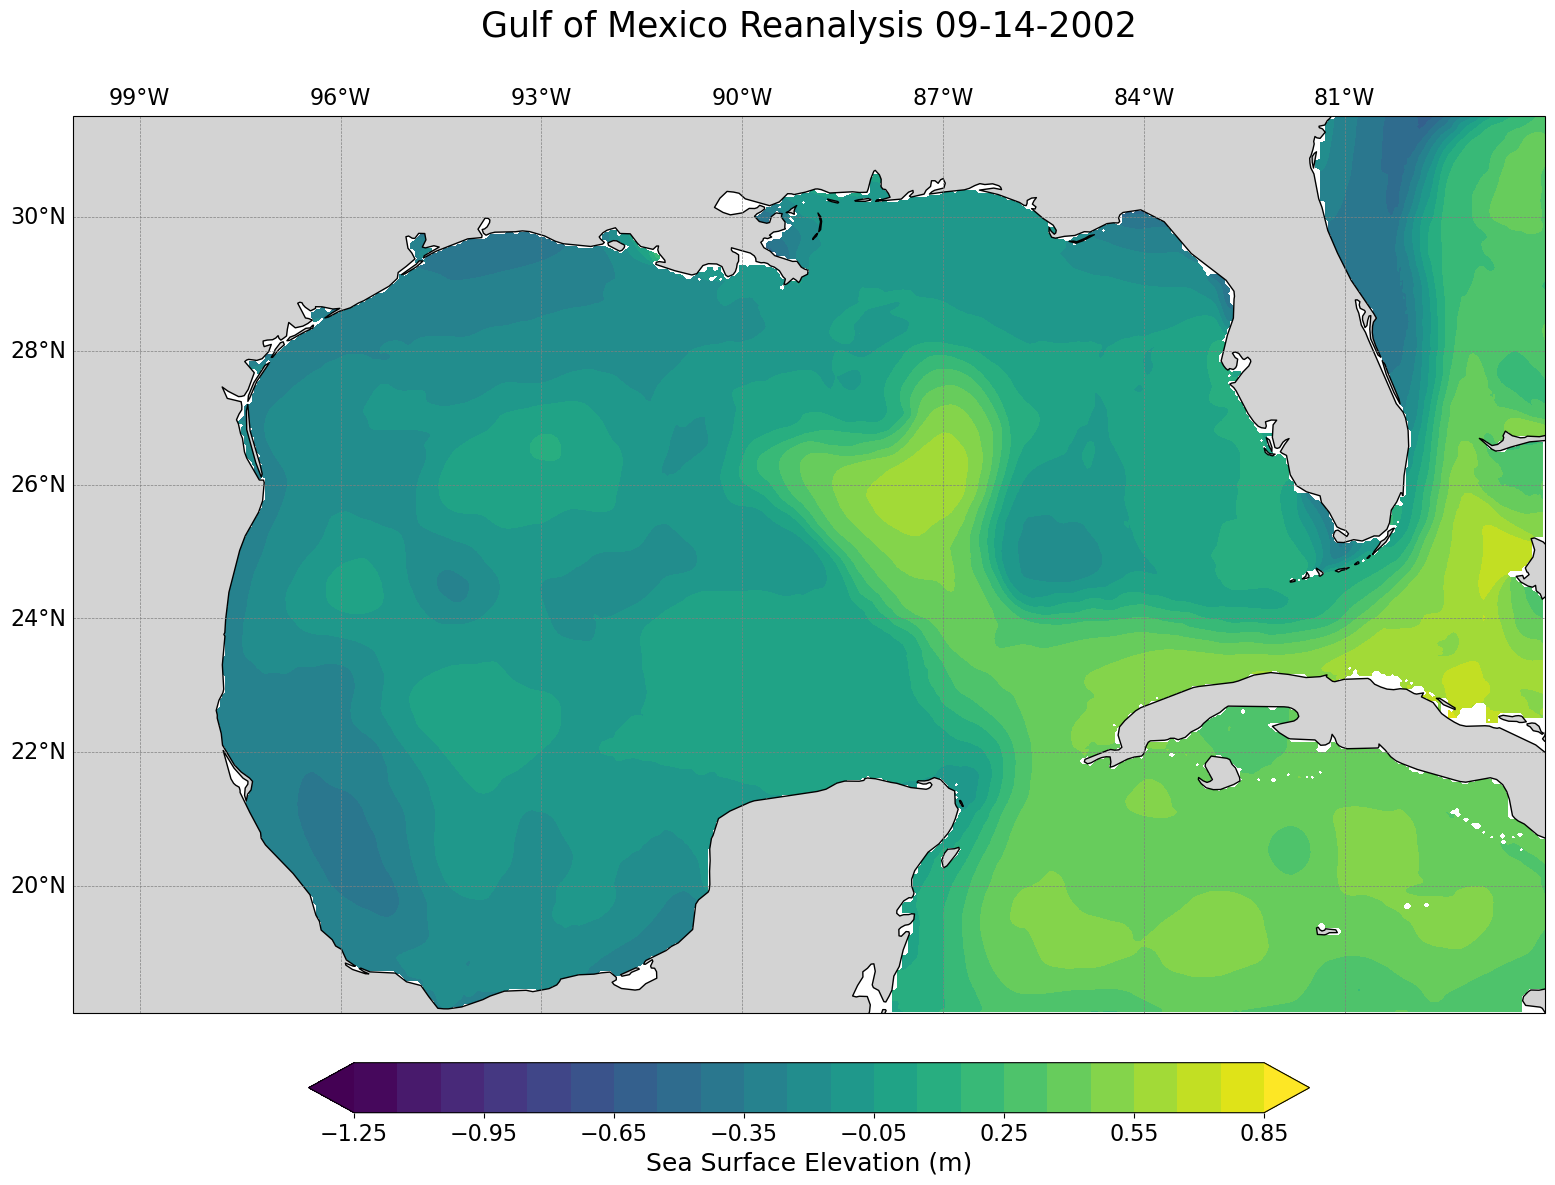

C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


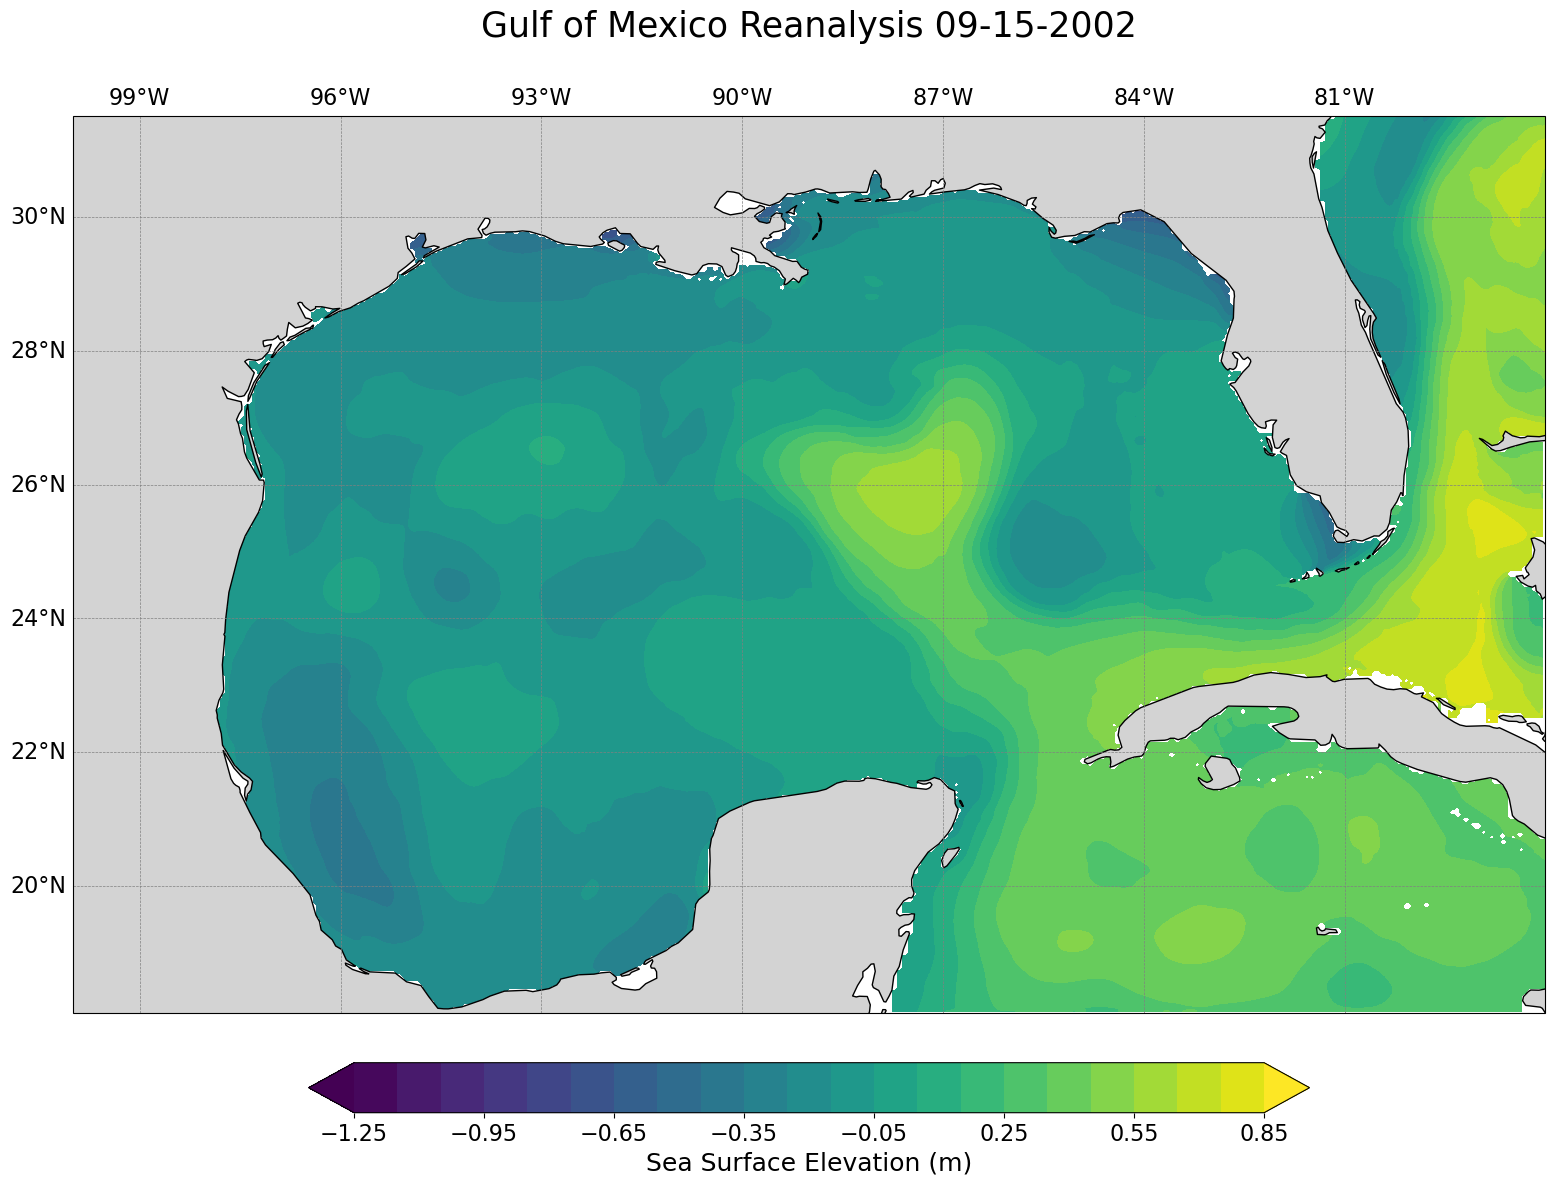

C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\vgarza6\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


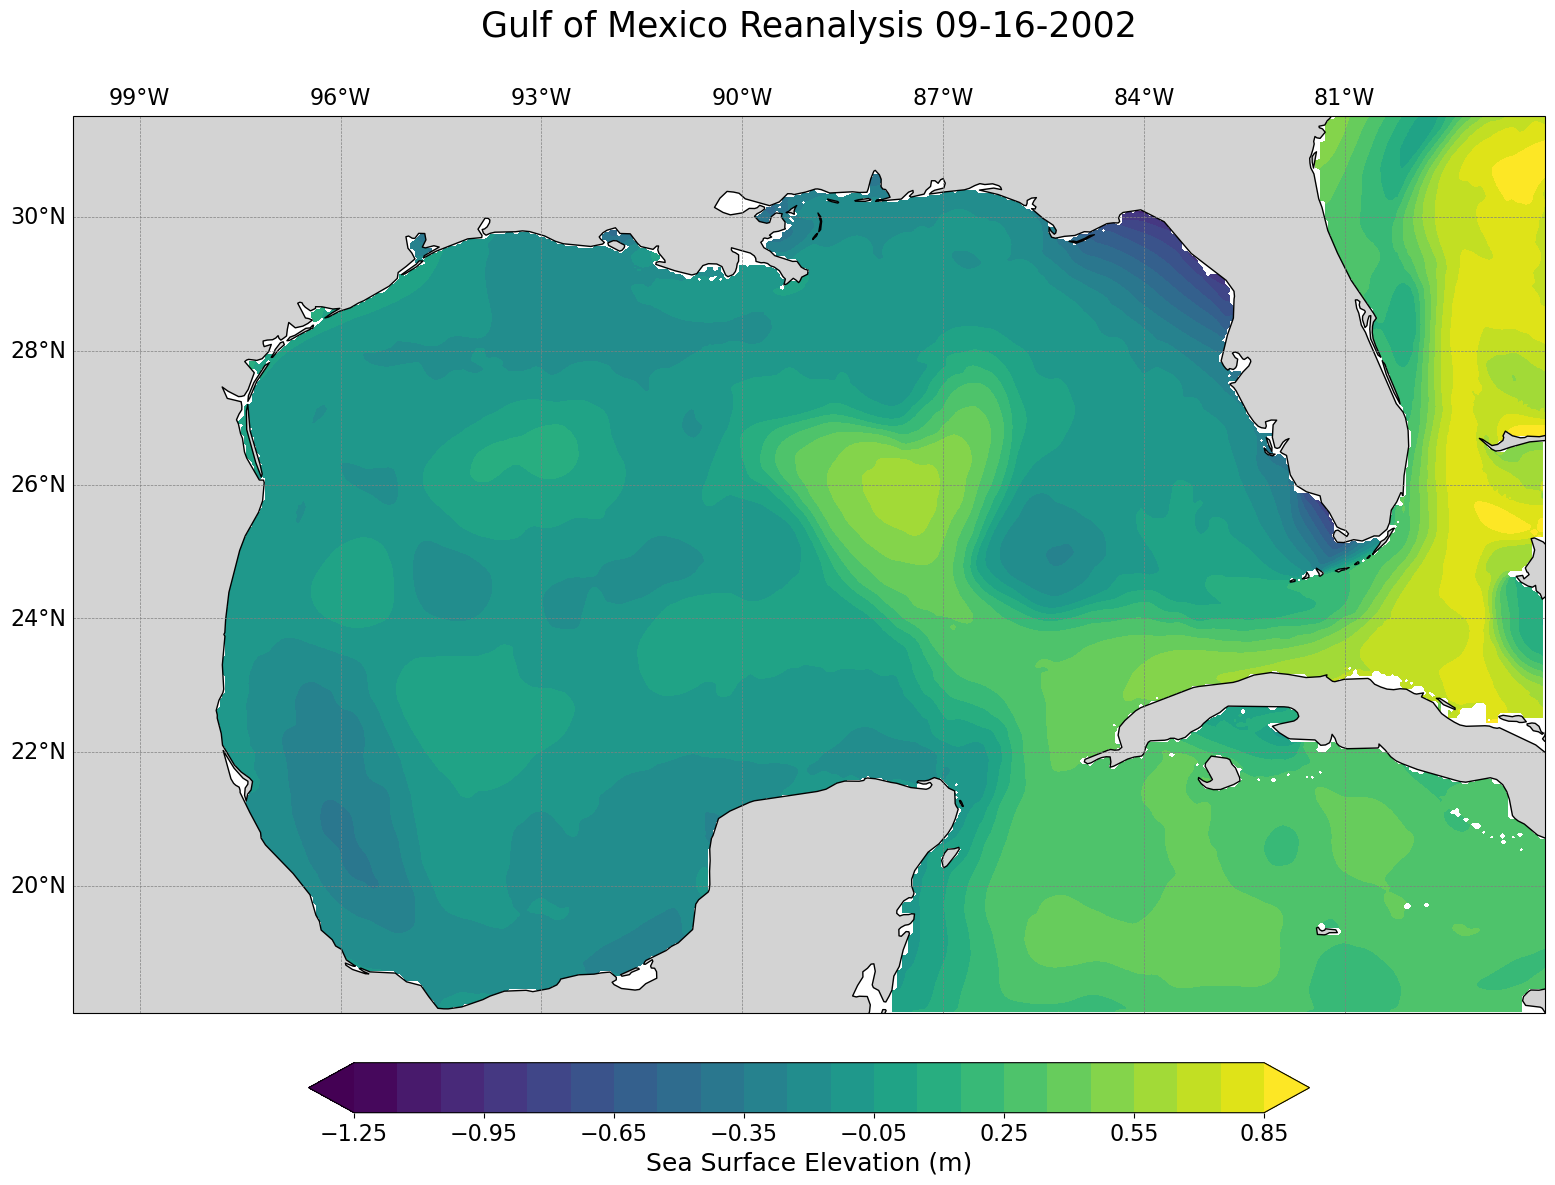

In [113]:
# We start off by looping through the amount of days we want to plot
for date_index in range(1,number_of_days+1):
    #Open open the data for the day that we are looking at 
    link = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_"+str(date_index).zfill(3)+"_01_2d.nc"
    data = xr.open_dataset(link, decode_times=False)
    
    #Creates the type of projection and the area of the projection
    fig, ax = plt.subplots(figsize =(19,13),subplot_kw=dict(projection=ccrs.PlateCarree()),facecolor='white')  
    ax.set_extent([260,282, 18.11, 31.5])

    #set variables from the data that will be plotted onto the map
    var = data.ssh[0,:,:] 
    x, y =data.Longitude, data.Latitude

    #Contours the data on tho the map projection
    p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(),vmin = min_level, vmax=max_level, levels = levels,extend='both')#,N=7)

    #Creates colorbar based on the contour 
    cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05,extend='bith')
    cbar.set_label("Sea Surface Elevation (m)" , size = 18)

        #Sets the land onto the projection with the right color and scale
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='black',
                                            facecolor='lightgrey')
    ax.add_feature(land_50m)

    #Sets the graph title and format the size and location of the title
    ax.set_title('Gulf of Mexico Reanalysis '+ str(date.strftime("%m-%d-%Y")), y=1.08, fontsize=25)

        ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
            #and sets the grid lines on the graph
        ##Set the grid lines to another variable so it edits the grid variables and not the whole map
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=.5, color='gray', linestyle='--')
    gl.xlabels_top = True    
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size' : 16}
    gl.ylabel_style = {'size' : 16}
    
    plt.show()
    #Save the plot in the given location and name, with the extension of the date
    fig.savefig(save_location + file_name +str(date.strftime("%m-%d-%Y"))+ '.png', bbox_inches='tight', dpi = 500)
 
    
    #Increment the date, as we go through to the next file so it matches up with the correct time
    date = date + timedelta(days=1)

In [ ]:
#GIF
https://github.com/chsharrison/Sci_comp_F24/blob/804ae48b6b3f9a4e63a8fed91294669a9eed45e6/kolin_bilbrew/KB7.1_2002.gif.gif

In [ ]:
#DaVinci
https://github.com/chsharrison/Sci_comp_F24/blob/804ae48b6b3f9a4e63a8fed91294669a9eed45e6/kolin_bilbrew/KB7.1_2002.drp